<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW4/MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [2]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [8]:
#example
x = 3
x

3

In [9]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [10]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [12]:
m31 = ...

In [15]:

m31.head()

,r,v,dv,err,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [ ]:
...

Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [ ]:
...


In [ ]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [ ]:
...

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [ ]:
...
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [ ]:
...

We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius ~and its uncertainty~ and the velocity and its uncertainty

In [ ]:
# first measurement including all mass
def getradii(...):
  ...

m31Rds = ...

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

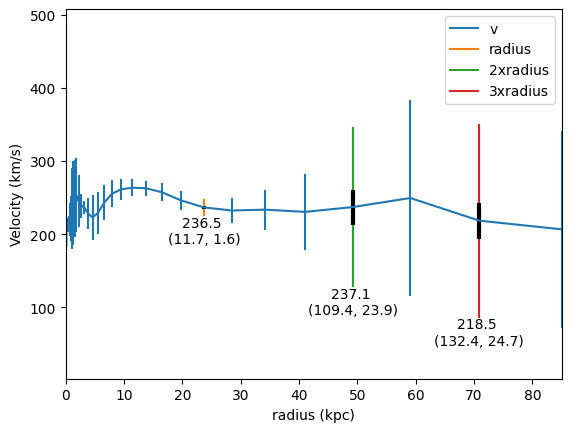

In [36]:
#delete leave plot
def plotGal(gal, rds):
    ...

plotGal(m31, m31Rds);


Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [ ]:
#delete
def vratios(...):
  ...


In [ ]:
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

In [ ]:
vratios(m31, m31Rds, 2)

In [ ]:
vratios(m31, m31Rds, 2, err='err')

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
#delete all below

https://en.wikipedia.org/wiki/Milky_Way
    